In [1]:
!pip install pulp;
!pip install numpy;
!pip install matplotlib;


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pulp
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Profit: Geldeinheit pro Stück
pA, pB, pC = 30, 20, 40

# Fixkosten bei Produktion eines Produkts
fA, fB, fC = 200, 150, 100

# Matrix nb für Nebenbedingungen
nb = np.array([[2, 1, 3], [1, 2, 1], [1, 1, 2]])

# Zielvektor b
b = np.array([100, 90, 80])

# Big-M-Kopplung
M = 200

**Initialisierung von model**

In [96]:
model = pulp.LpProblem("Produktionsplanung", pulp.LpMaximize)

Produktionsmengen *xA, xB, xC* der Produkte *A, B, C*

In [97]:
xA = pulp.LpVariable("Prod_A", lowBound=0, cat="Integer")
xB = pulp.LpVariable("Prod_B", lowBound=0, cat="Integer")
xC = pulp.LpVariable("Prod_C", lowBound=0, cat="Integer")

yA = pulp.LpVariable("xA>0", cat="Binary")
yB = pulp.LpVariable("xB>0", cat="Binary")
yC = pulp.LpVariable("xC>0", cat="Binary")

**Zielfunktion**

In [98]:
model += pA*xA + pB*xB + pC*xC - fA*yA - fB*yB - fC*yC

**Nebenbedingungen:** Machinenkapazität, Materialmenge, Arbbeitszeit

In [99]:
for i, row in enumerate(nb):
    model += row[0]*xA + row[1]*xB + row[2]*xC <= b[i]

model += xA <= M*yA
model += xB <= M*yB
model += xC <= M*yC

**Lösen**

In [100]:
model.solve();
print("Status:", pulp.LpStatus[model.status])
print("A:", xA.value())
print("B:", xB.value())
print("C:", xC.value())
print("Max Profit:", pulp.value(model.objective))

Status: Optimal
A: 50.0
B: 0.0
C: 0.0
Max Profit: 1350.0


**Maschinenkapazität** (erste Zeile von nb) **variieren**

In [101]:
def solve_machine_capacity(mac_cap):
    model_cap = pulp.LpProblem("Produktionsplanung_cap", pulp.LpMaximize)

    xA = pulp.LpVariable("Prod_A", lowBound=0, cat="Integer")
    xB = pulp.LpVariable("Prod_B", lowBound=0, cat="Integer")
    xC = pulp.LpVariable("Prod_C", lowBound=0, cat="Integer")

    yA = pulp.LpVariable("xA>0", cat="Binary")
    yB = pulp.LpVariable("xB>0", cat="Binary")
    yC = pulp.LpVariable("xC>0", cat="Binary")

    model_cap += pA*xA + pB*xB + pC*xC - fA*yA - fB*yB - fC*yC

    b_test = b.copy()
    b_test[0] = mac_cap

    for i, row in enumerate(nb):
        model_cap += row[0]*xA + row[1]*xB + row[2]*xC <= b_test[i]
    
    model_cap += xA <= M*yA
    model_cap += xB <= M*yB
    model_cap += xC <= M*yC
    model_cap.solve()

    return pulp.value(model_cap.objective)

In [102]:
machine_caps = range(0, 101, 10)
profits = [solve_machine_capacity(i) for i in machine_caps]

print(list(zip(machine_caps, profits)))

[(0, 0.0), (10, 50.0), (20, 250.0), (30, 450.0), (40, 650.0), (50, 750.0), (60, 830.0), (70, 950.0), (80, 1070.0), (90, 1200.0), (100, 1350.0)]


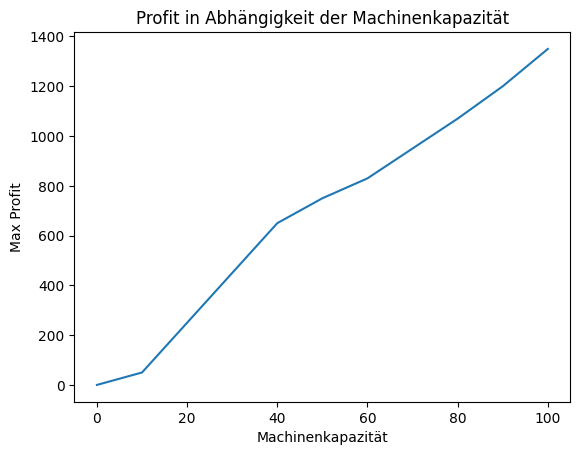

In [103]:
plt.plot(machine_caps, profits)
plt.xlabel("Machinenkapazität")
plt.ylabel("Max Profit")
plt.title("Profit in Abhängigkeit der Machinenkapazität")
plt.show()